In [1]:
import os
import sys

import gempy as gp

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Source data

In [2]:
# Set path to data;
path_to_project_data = "service/project/DATA"

In [3]:
# Get items within the DATA directory;
items = [i for i in os.listdir(path_to_project_data)]

# Print gathered items;
print(items)

['anticline_orientations.csv', 'anticline_surfacespoints.csv']


### Configure geo_model

#### Initial data

In [4]:
# Init geo_model
geo_model = gp.create_model("geo_model")

In [5]:
# Set global variables
RESOLUTION = [50,50,50]

EXTENT = [0,1000,0,1000,0,1000]

sketchboard_resolution = {
    "width": 100,
    "height": 100
}

In [6]:
# Set geo_data
gp.init_data(
    geo_model=geo_model,
    extent=EXTENT,
    resolution=RESOLUTION,
    path_o=path_to_project_data + "/anticline_orientations.csv",
    path_i=path_to_project_data + "/anticline_surfacespoints.csv"
)

Active grids: ['regular']


geo_model  2020-03-10 13:52

In [7]:
# Map series to surfaces
gp.map_series_to_surfaces(
    geo_model=geo_model,
    mapping_object={
        "Strat_Series": ('rock2','rock1'),
        "Basement_Series":('basement')
    }
)

,surface,series,order_surfaces,isActive,color,id
0,rock1,Strat_Series,1,True,#015482,1
1,rock2,Strat_Series,2,True,#9f0052,2
2,basement,Basement_Series,1,True,#ffbe00,3


### Compile modeling function

In [8]:
# Compile theano function
gp.set_interpolation_data(
    geo_model=geo_model,
    theano_optimizer='fast_run'
)

Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


### Compute solutions

In [9]:
# compute solution
sol = gp.compute_model(model=geo_model)

/home/namur/coding/gempy/gempy/core/solution.py:266: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


### Visualize

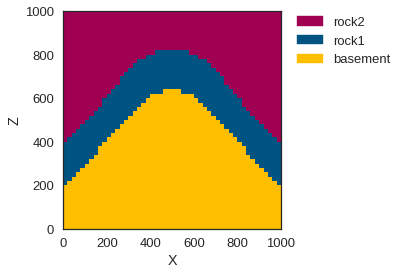

In [10]:
%matplotlib inline
gp.plot.plot_section(
    model=geo_model,
    cell_number=15,
    direction='y',
    show_data=True
)

### Postprocessing

#### Section

In [11]:
# Define section to be interpolated;
section_dict = {
    'section_sektchboard':(
        [EXTENT[0], EXTENT[2]],
        [EXTENT[1], EXTENT[3]], 
        [
            sketchboard_resolution["width"],
            sketchboard_resolution["height"]
        ]
    )
}

In [12]:
# Add section to geo_model.grid class
geo_model.set_section_grid(section_dict)

Active grids: ['regular']


,start,stop,resolution,dist
section_sektchboard,"[0, 0]","[1000, 1000]","[100, 100]",1414.213562


In [13]:
# Calculate solution again to include section
solutions = gp.compute_model(model=geo_model, compute_mesh=True)

In [14]:
# Plot the result
gp.plot.plot_section_by_name(model=geo_model, section_name='section_sektchboard')

AttributeError: no sections for plotting defined

### Get section as polygon

0.7071067811865475


TypeError: 'NoneType' object is not subscriptable

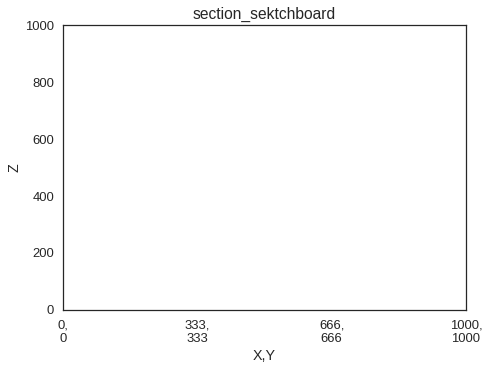

In [15]:
# this stores the xy points in the sections for every surface.
from gempy.utils import section_utils
polygondict, cdict, extent = section_utils.get_polygon_dictionary(geo_model, 'section_sektchboard')